In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier   

In [2]:
#importing training data to pandas dataframe
df=pd.read_csv('training.csv',index_col='id')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Remove 'split' column - does not have impact on event
df=df.drop(columns=['split'])

#Inverse event value - give more weight to minority class that is of our particular interest 
df['event'].replace({0:1, 1:0},inplace=True)

#set the target column separate from dataframe
dfy=df['event']

#Fill missing values with mean 
df.fillna(df.median(),inplace=True)

#Prepare data use in ML algorithms
X=df.values
y=dfy.values

#Print out percentage of samples - gives an idea of the proportion of events
print('Default %:',dfy.sum()/df.shape[0]*100)

df

Default %: 2.5255824080121925


,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
1,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
2,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
3,0,1.0,2.096510e+07,1.509004,13.0,8.1052,0.296218,24.0,62.750000
4,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
...,...,...,...,...,...,...,...,...,...
238831,0,1.0,6.523118e+04,1.509004,13.0,8.1052,0.296218,24.0,58.916667
238832,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
238833,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667


In [3]:
#importing TEST data to pandas dataframe

df1=pd.read_csv('test.csv',index_col='id')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1=df1.drop(columns=['split'])
df1['event'].replace({0:1, 1:0},inplace=True)

dfy1=df1['event']
#df1=df1.drop("event" ,axis= 1)

df1.fillna(df.median(),inplace=True)
X1=df1.values
y1=dfy1.values

#importing training data to pandas dataframe
print('Default %:',dfy1.sum()/df1.shape[0]*100)

df1

Default %: 2.5004605670836892


,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,0,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,24.0,73.041667
1,0,1.0,8.042291e+05,1.509004,4.0,8.105200,0.296218,24.0,58.666667
2,0,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,24.0,76.250000
3,0,1.0,3.576348e+06,0.483255,13.0,60.801780,0.296218,24.0,80.083333
4,0,1.0,8.443072e+06,1.509004,13.0,0.525225,0.296218,24.0,87.625000
...,...,...,...,...,...,...,...,...,...
59704,0,1.0,1.060430e+06,1.509004,13.0,8.105200,0.296218,24.0,58.666667
59705,0,1.0,8.042291e+05,1.509004,13.0,8.105200,0.296218,24.0,58.666667
59706,0,1.0,1.593264e+07,1.509004,13.0,8.105200,0.296218,24.0,58.666667


In [4]:
import scorecardpy as sc
print(pd.__version__)

# Create woebin bins
bins = sc.woebin(df, y="event")
bins_df = pd.concat([pd.DataFrame(bins[var]) for var in bins])

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:13


In [5]:
pd.concat([pd.DataFrame(bins['var1']),
          pd.DataFrame(bins['var2']),
           pd.DataFrame(bins['var3']),
           pd.DataFrame(bins['var4']),
           pd.DataFrame(bins['var5']),
           pd.DataFrame(bins['var6']),
           pd.DataFrame(bins['var7']),
           pd.DataFrame(bins['var8']),
          ])

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,var1,"[-inf,2.0)",215781,0.903469,210707,5074,0.023515,-0.073221,0.004679,0.037574,2.0,False
1,var1,"[2.0,inf)",23055,0.096531,22097,958,0.041553,0.514769,0.032895,0.037574,inf,False
0,var2,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var3,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var3,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var5,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var6,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var7,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000,0.000000,inf,False
0,var8,"[-inf,52.0)",30610,0.128163,29825,785,0.025645,0.015700,0.000032,0.136985,52.0,False
1,var8,"[52.0,58.0)",17872,0.074830,17550,322,0.018017,-0.345139,0.007594,0.136985,58.0,False


In [6]:
df.head(10)

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
1,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
2,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
3,0,1.0,2.096510e+07,1.509004,13.0,8.1052,0.296218,24.0,62.750000
4,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
5,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
6,0,1.0,1.361692e+06,1.509004,13.0,8.1052,0.296218,24.0,65.166667
7,0,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
8,0,1.0,2.268649e+06,1.509004,13.0,8.1052,0.296218,24.0,61.208333


-------- 1/1 var8 --------
>>> dt[var8].describe(): 
count    238836.000000
mean         58.594878
std           7.635095
min          24.416667
25%          58.666667
50%          58.666667
75%          58.666667
max         118.666667
Name: var8, dtype: float64 



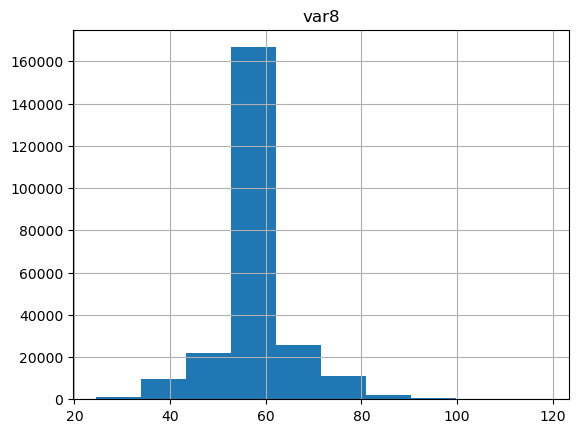

>>> Current breaks:
52.0,58.0,60.0 



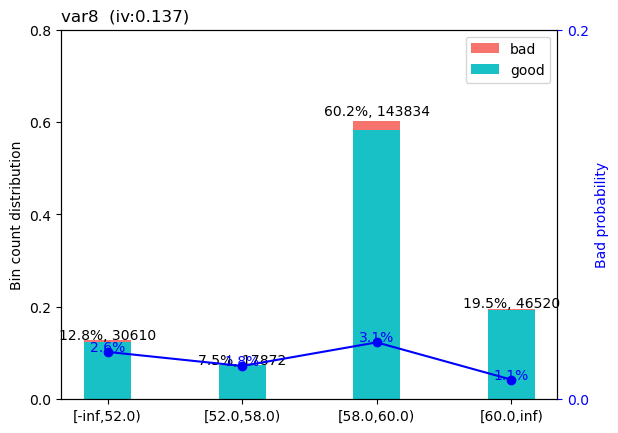

>>> Adjust breaks for (1/1) var8?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:11


In [7]:
# binning adjustment
## adjust breaks interactively
breaks_adj = sc.woebin_adj(df, y="event", bins=bins) 
## or specify breaks manually
bins_adj = sc.woebin(df, y="event", breaks_list=breaks_adj)

Number of class 1 examples before: (6032, 8)
Number of class 1 examples after: (232804, 8)
(238836, 8)
(232804, 8)
(238836,)
(232804,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

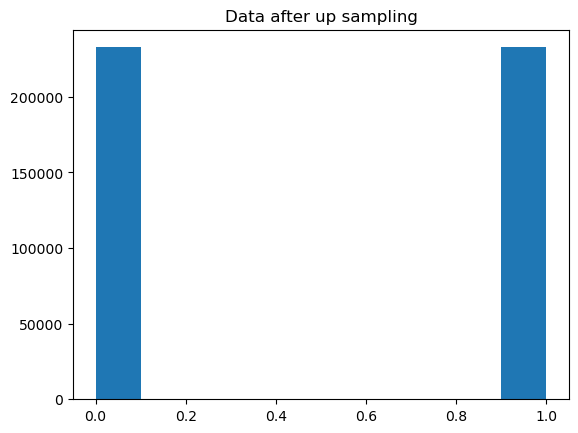

In [8]:
#Up-sampling - address class imbalance / prevent bias toward majority class
from sklearn.utils import resample

X_train=df.drop("event" ,axis= 1)
y_train=dfy

print('Number of class 1 examples before:', X_train[y_train == 1].shape)



X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y_bal)
#plt.savefig('images/data_upsample_dist.png', dpi=300)

(465608, 8)
(59709, 9)
(465608,)
(59709,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

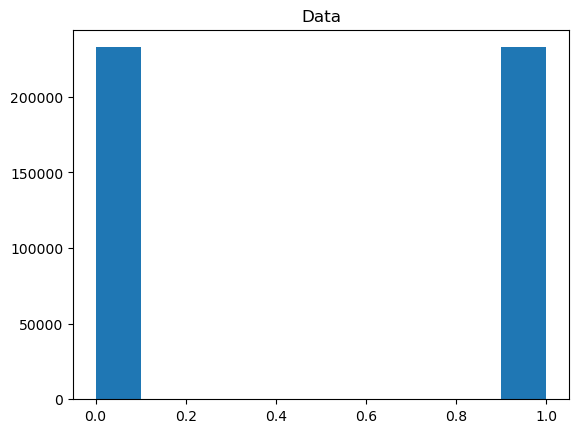

In [9]:
from sklearn.model_selection import train_test_split

X_train=X_bal
X_test=df1
y_train=y_bal
y_test=y1

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data')
plt.hist(y_train)

In [10]:
X_train=pd.DataFrame(X_train,columns=df.columns[1:])

In [11]:
# converting train and test into woe values
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(X_test, bins)

X_train = train_woe
X_test = test_woe

[INFO] converting into woe values ...
Woe transformating on 465608 rows and 8 columns in 00:00:11
[INFO] converting into woe values ...


In [12]:
X_test.drop("event" ,axis= 1,inplace=True)

In [28]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
np.set_printoptions(8)
print(lr.intercept_)
print(lr.coef_[lr.coef_!=0].shape)
print(lr.coef_)

[-0.00242303]
(3,)
[[0.         0.40240638 0.         1.1617483  0.         0.
  0.         1.0061963 ]]


In [30]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='f1', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var5_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var1_woe
0.2526603460183561
{'logisticregression__C': 0.001}
var3_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var8_woe
0.6675519024410463
{'logisticregression__C': 0.001}
var7_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var2_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var6_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var4_woe
0.34083950677154434
{'logisticregression__C': 0.001}


0.9333936257515617
              precision    recall  f1-score   support

           0     0.9793    0.9518    0.9654     58216
           1     0.1027    0.2150    0.1390      1493

    accuracy                         0.9334     59709
   macro avg     0.5410    0.5834    0.5522     59709
weighted avg     0.9574    0.9334    0.9447     59709



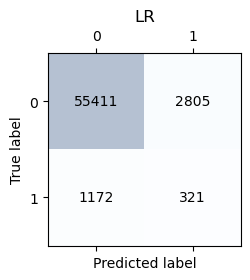

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

clf = LogisticRegression(penalty='l2', 
                          C=1e-08,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))
print(classification_report(y_test, clf.predict(X_test),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('LR')

plt.show()

Logistic regression
              precision    recall  f1-score   support

           0     0.9893    0.3768    0.5458     58216
           1     0.0334    0.8406    0.0643      1493

    accuracy                         0.3884     59709
   macro avg     0.5114    0.6087    0.3050     59709
weighted avg     0.9654    0.3884    0.5337     59709



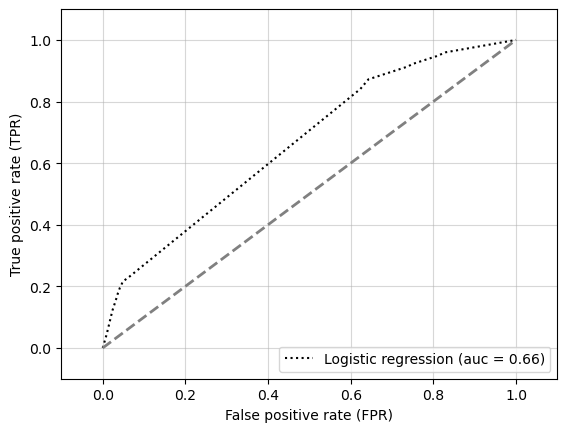

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Logistic regression']

all_clf = [pipe]


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid = {'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs_dt = GridSearchCV(estimator=pipe_dt,
param_grid=param_grid,
scoring='accuracy',
refit=True,
cv=5,
n_jobs=-1)

gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.6087782068815809
{'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


0.3859384682376191
              precision    recall  f1-score   support

           0     0.9902    0.3739    0.5428     58216
           1     0.0338    0.8553    0.0651      1493

    accuracy                         0.3859     59709
   macro avg     0.5120    0.6146    0.3040     59709
weighted avg     0.9663    0.3859    0.5309     59709



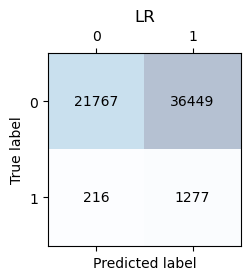

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

clf = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))
print(classification_report(y_test, clf.predict(X_test),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('DT')

plt.show()

Decision Tree
              precision    recall  f1-score   support

           0     0.9902    0.3739    0.5428     58216
           1     0.0338    0.8553    0.0651      1493

    accuracy                         0.3859     59709
   macro avg     0.5120    0.6146    0.3040     59709
weighted avg     0.9663    0.3859    0.5309     59709



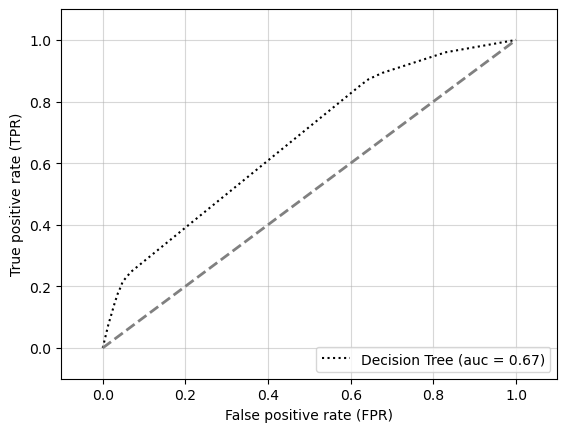

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Decision Tree']

all_clf = [pipe]


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc

def train_and_evaluate_model(X_train, y_train, X_test, y_test, criterion='gini', max_depth=4, random_state=1):
    # Initialize a RandomForestClassifier model
    model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data and print the accuracy score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {accuracy:.4f}")

    # Print the classification report and calculate the f1 score
    report = classification_report(y_test, y_pred, digits=4)
    print(report)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score: {f1:.4f}")

    # Calculate the AUC-ROC and plot the ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC score: {auc_roc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Plot the confusion matrix
    confmat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Random Forest Confusion Matrix')
    plt.show()
    
    # Return the model
    return model


Accuracy score: 0.3859
              precision    recall  f1-score   support

           0     0.9902    0.3739    0.5428     58216
           1     0.0338    0.8553    0.0651      1493

    accuracy                         0.3859     59709
   macro avg     0.5120    0.6146    0.3040     59709
weighted avg     0.9663    0.3859    0.5309     59709

F1 score: 0.0651
AUC-ROC score: 0.6708


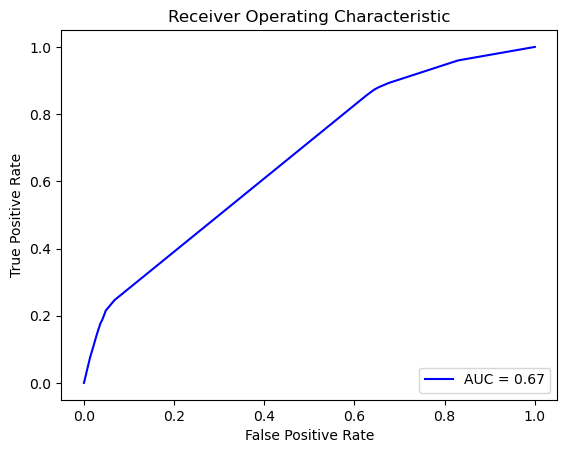

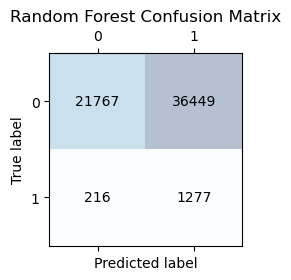

In [18]:
model = train_and_evaluate_model(X_train, y_train, X_test, y_test, criterion='gini', max_depth=4, random_state=1)


In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

# Defining hyperparameters to tune
params = {
    "learning_rate": [0.001, 0.05, 0.1, 0.15],
    "max_depth": [1, 3, 5, 7],
    "n_estimators": [10, 100, 200, 300]
}

# Creating a Grid Search object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

# Fitting the Grid Search object to the training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Creating an XGBoost classifier with the best hyperparameters
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False, **best_params)

# Training the model with the best hyperparameters
xgb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion_mat)
print("Classification Report: \n", classification_rep)


Best Hyperparameters:  {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 10}
Accuracy:  0.974744175919878
Confusion Matrix: 
 [[58201     0]
 [ 1508     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     58201
           1       0.00      0.00      0.00      1508

    accuracy                           0.97     59709
   macro avg       0.49      0.50      0.49     59709
weighted avg       0.95      0.97      0.96     59709



In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc

def train_and_evaluate_model(X_train, y_train, X_test, y_test, max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic'):
    # Initialize an XGBClassifier model
    model = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data and print the accuracy score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {accuracy:.4f}")

    # Print the classification report and calculate the f1 score
    report = classification_report(y_test, y_pred, digits=4)
    print(report)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score: {f1:.4f}")

    # Calculate the AUC-ROC and plot the ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC score: {auc_roc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Plot the confusion matrix
    confmat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('XGBoost Confusion Matrix')
    plt.show()
    
    # Return the model
    return model


Accuracy score: 0.3859
              precision    recall  f1-score   support

           0     0.9902    0.3739    0.5428     58216
           1     0.0338    0.8553    0.0651      1493

    accuracy                         0.3859     59709
   macro avg     0.5120    0.6146    0.3040     59709
weighted avg     0.9663    0.3859    0.5309     59709

F1 score: 0.0651
AUC-ROC score: 0.6708


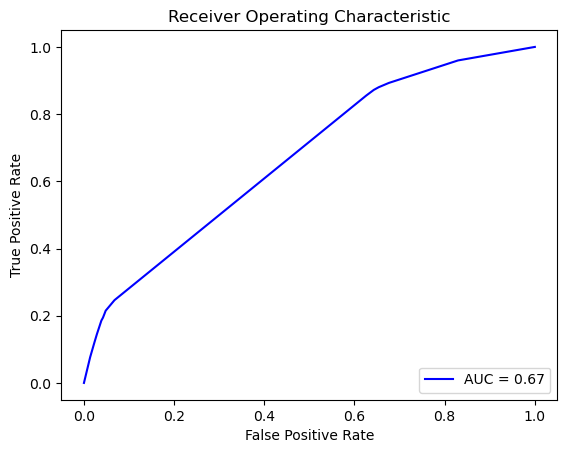

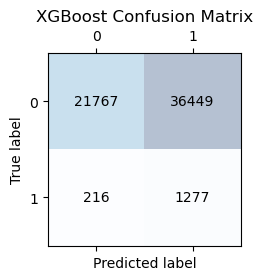

In [23]:
model = train_and_evaluate_model(X_train, y_train, X_test, y_test, max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic')


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd



# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

# Defining hyperparameters to tune
params = {
    "learning_rate": [0.001, 0.05, 0.1, 0.15],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],
    "gamma": [0, 0.1, 0.5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

# Creating a Grid Search object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

# Fitting the Grid Search object to the training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Creating an XGBoost classifier with the best hyperparameters
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False, **best_params)

# Training the model with the best hyperparameters
xgb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion_mat)
print("Classification Report: \n", classification_rep)
